In [11]:
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np


df = pd.read_csv(r"C:\Users\Tassili\Downloads\2021_MPG_data.csv")

df.head()

Model Year             Mfr Name                  Division         Carline  \
0        2021                Honda                     Acura             NSX   
1        2021         aston martin  Aston Martin Lagonda Ltd  Vantage Manual   
2        2021         aston martin  Aston Martin Lagonda Ltd      Vantage V8   
3        2021  Volkswagen Group of                      Audi              R8   
4        2021  Volkswagen Group of                      Audi          R8 2WD   

  Verify Mfr Cd Country of Origin  Index (Model Type Index)  Eng Displ  # Cyl  \
0           HNX             Japan                        39        3.5      6   
1           ASX    United Kingdom                         5        4.0      8   
2           ASX    United Kingdom                         4        4.0      8   
3           VGA           Germany                         5        5.2     10   
4           VGA           Germany                         7        5.2     10   

  Transmission  ...                    Fuel Metering Sys Desc  \
0  Auto(AM-S9)  ...  Spark Ignition direct & ported injection   
1   Manual(M7)  ...      Multipoint/sequential fuel injection   
2     Auto(S8)  ...      Multipoint/sequential fuel injection   
3  Auto(AM-S7)  ...  Spark Ignition direct & ported injection   
4  Auto(AM-S7)  ...  Spark Ignition direct & ported injection   

   Fuel Cell Vehicle (Y or N)  Camless Valvetrain (Y or N)  \
0                           N                            N   
1                           N                            N   
2                           N                            N   
3                           N                            N   
4                           N                            N   

            Oil Viscosity  Stop/Start System (Engine Management System) Code  \
0                   0W-40                                                  Y   
1                    0W40                                                  Y   
2                    0W40                                                  N   
3  0W30 VW50400 / VW50700                                                  N   
4  0W30 VW50400 / VW50700                                                  N   

   Stop/Start System (Engine Management System)  Description  \
0                                                Yes           
1                                                Yes           
2                                                 No           
3                                                 No           
4                                                 No           

   MFR Calculated Gas Guzzler MPG   City CO2 Rounded Adjusted  \
0                             29.5                        420   
1                             27.0                        636   
2                             27.0                        494   
3                             19.4                        663   
4                             20.2                        645   

   Hwy CO2 Rounded Adjusted Comb CO2 Rounded Adjusted (as shown on FE Label)  
0                       406                                              420  
1                       426                                              541  
2                       364                                              435  
3                       450                                              567  
4                       386                                              528  

[5 rows x 60 columns]

In [16]:
df.shape

(1108, 60)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 60 columns):
 #   Column                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                     --------------  -----  
 0   Model Year                                                                                                 1108 non-null   int64  
 1   Mfr Name                                                                                                   1108 non-null   object 
 2   Division                                                                                                   1108 non-null   object 
 3   Carline                                                                                                    1108 non-null   object 
 4   Verify Mfr Cd                                                           

In [9]:
df.duplicated().sum()

0

<Axes: >

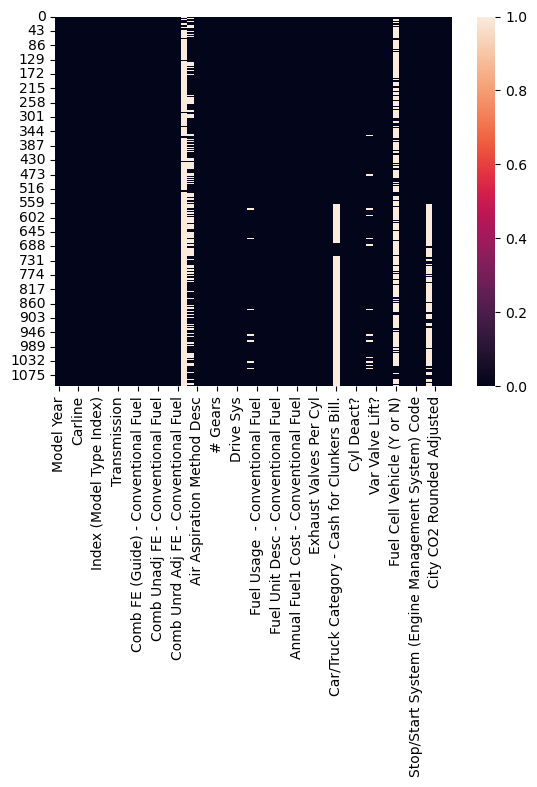

In [12]:
sns.heatmap(df.isna())

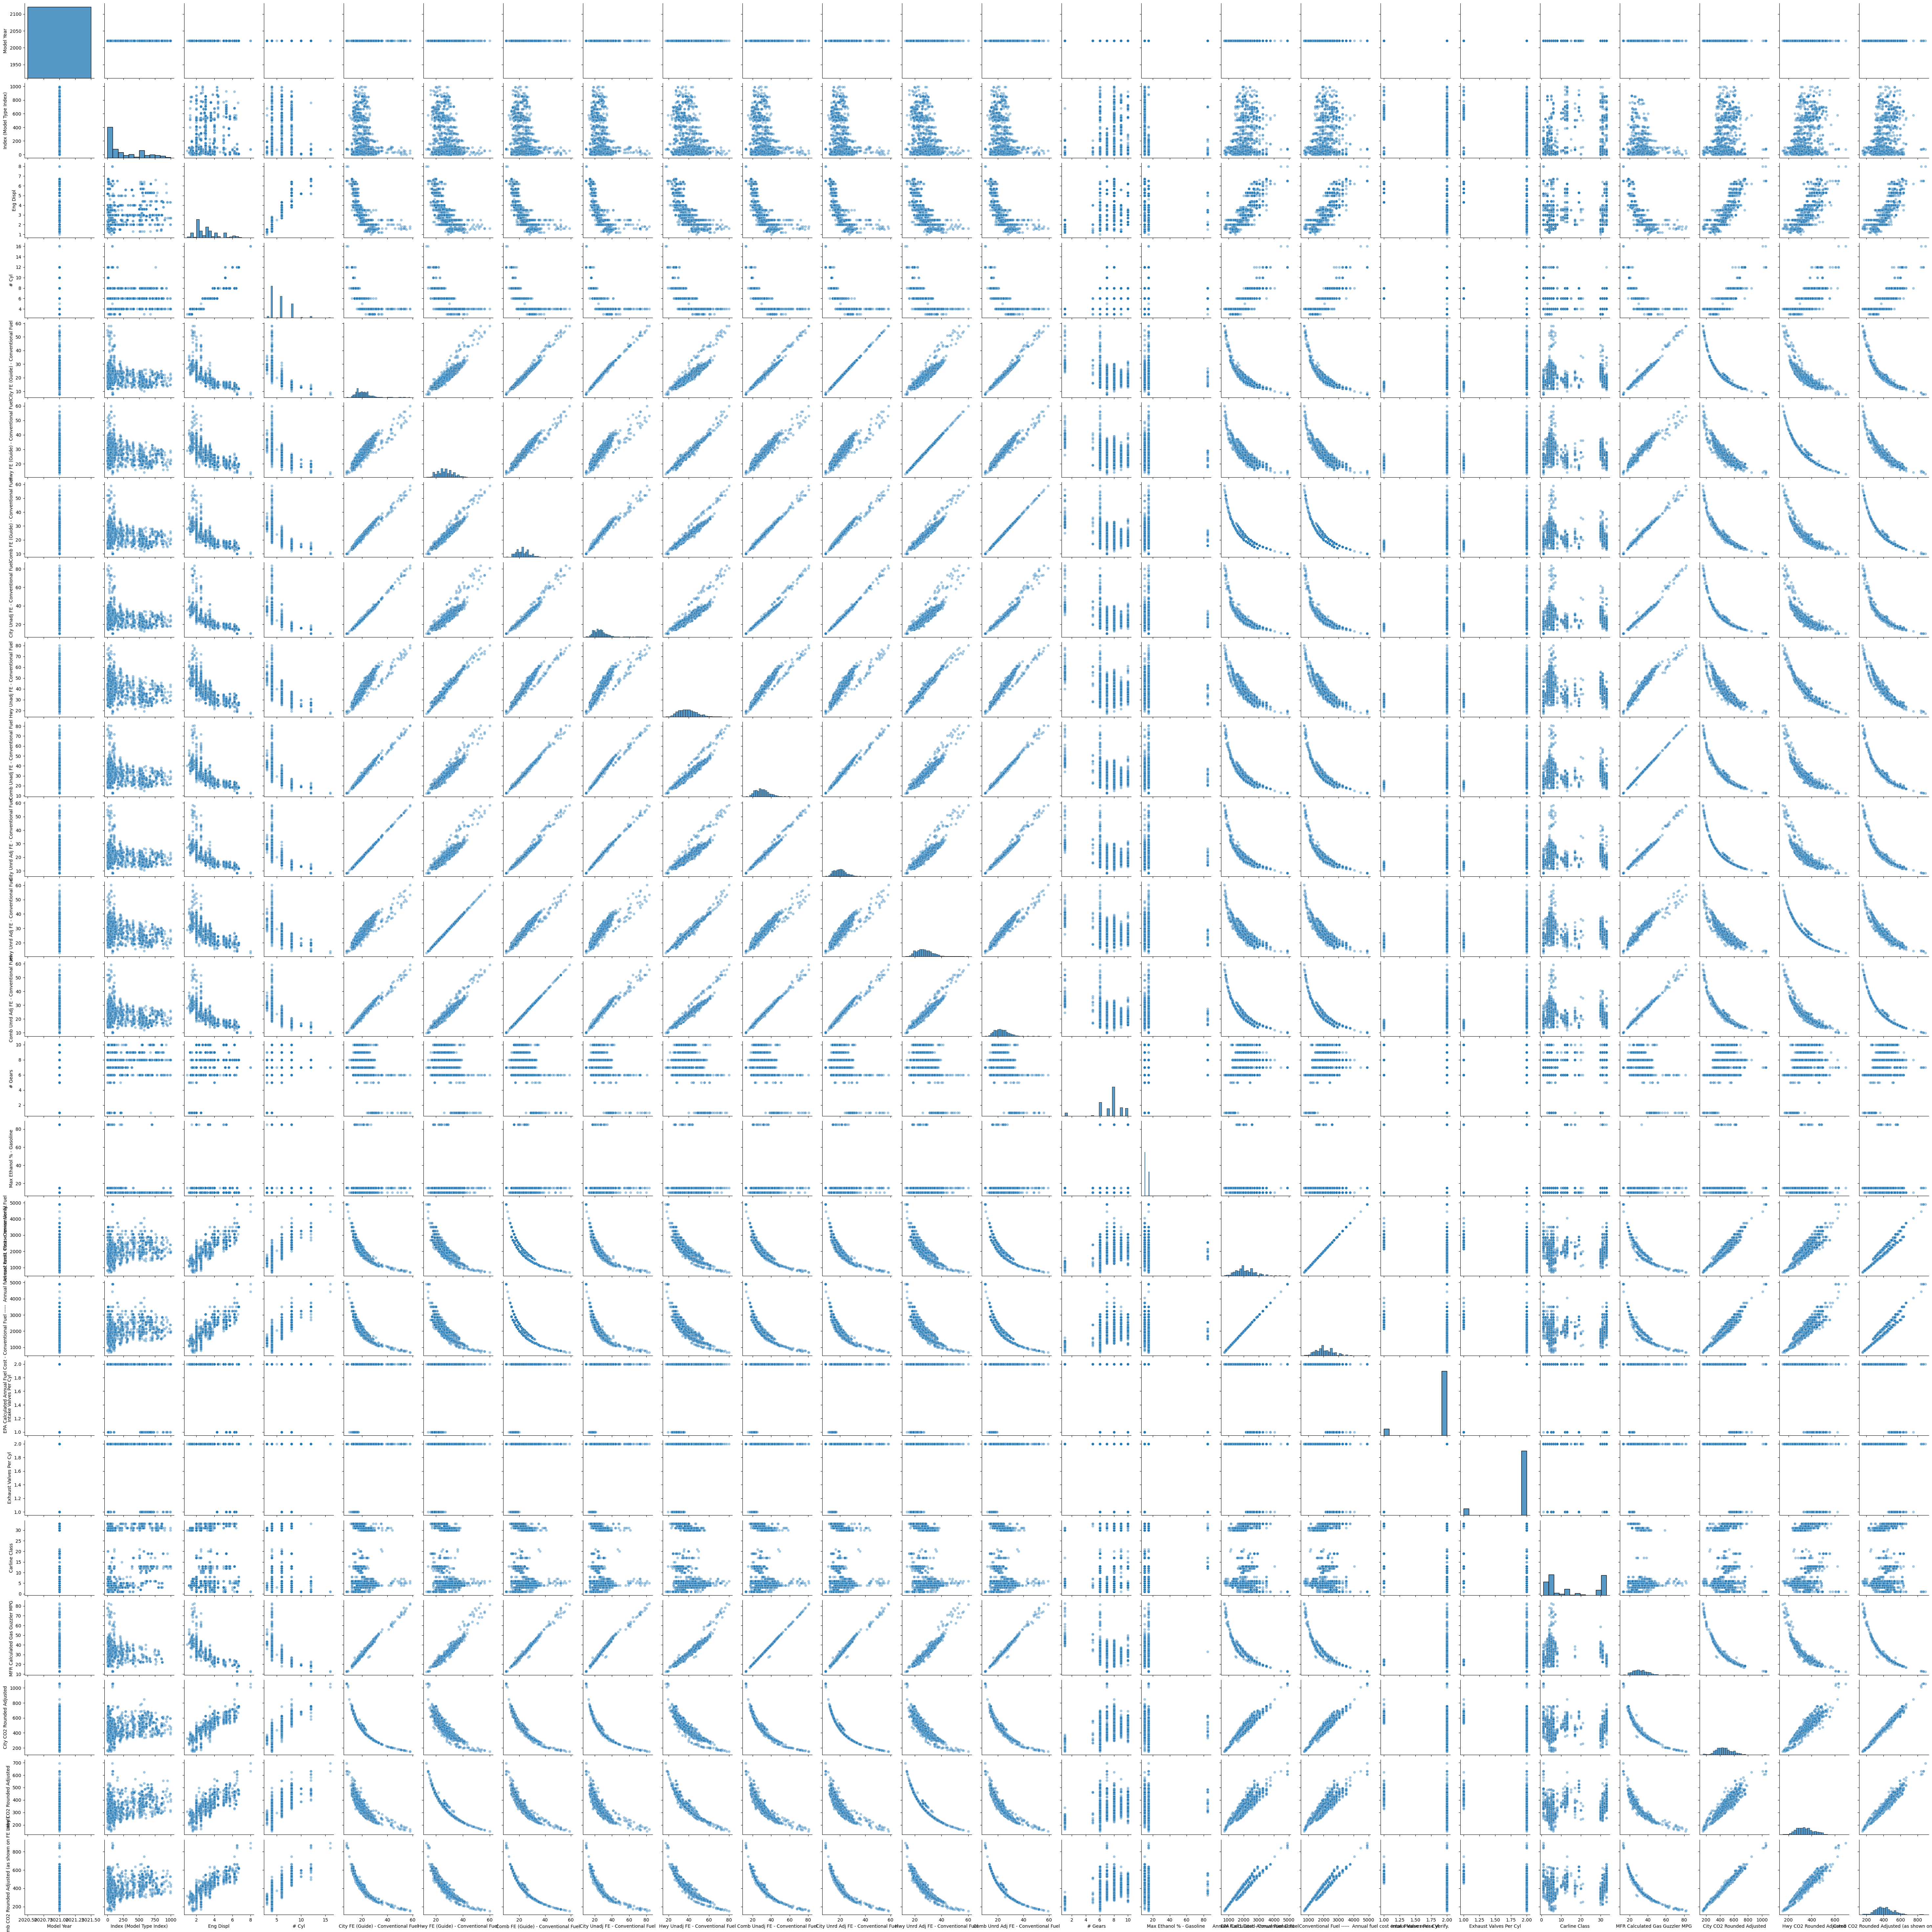

In [14]:
sns.pairplot(df, kind = 'scatter' , plot_kws = {'alpha': 0.4})

In [46]:
numerical_columns = []
categorical_columns =  []

for i in df.columns:
    if df[i].dtype == np.dtype("int64") or df[i].dtype == np.dtype("float64"):
        numerical_columns.append(df[i])
      
    else:
        categorical_columns.append(df[i])
        

In [47]:
numerical_data = pd.concat(numerical_columns, axis=1)

numerical_data

Model Year  Index (Model Type Index)  Eng Displ  # Cyl  \
0           2021                        39        3.5      6   
1           2021                         5        4.0      8   
2           2021                         4        4.0      8   
3           2021                         5        5.2     10   
4           2021                         7        5.2     10   
...          ...                       ...        ...    ...   
1103        2021                         6        5.7      8   
1104        2021                        34        5.7      8   
1105        2021                         1        3.6      6   
1106        2021                        52        2.0      4   
1107        2021                        53        2.0      4   

      City FE (Guide) - Conventional Fuel  Hwy FE (Guide) - Conventional Fuel  \
0                                      21                                  22   
1                                      14                                  21   
2                                      18                                  24   
3                                      13                                  20   
4                                      14                                  23   
...                                   ...                                 ...   
1103                                   13                                  17   
1104                                   13                                  17   
1105                                   16                                  22   
1106                                   19                                  28   
1107                                   20                                  28   

      Comb FE (Guide) - Conventional Fuel  City Unadj FE - Conventional Fuel  \
0                                      21                            28.7000   
1                                      17                            17.3588   
2                                      20                            22.5379   
3                                      16                            15.8765   
4                                      17                            15.8768   
...                                   ...                                ...   
1103                                   14                            15.4498   
1104                                   14                            15.6114   
1105                                   18                            20.0000   
1106                                   22                            24.4000   
1107                                   23                            25.9000   

      Hwy Unadj FE - Conventional Fuel  Comb Unadj FE - Conventional Fuel  \
0                              30.2000                            29.3561   
1                              29.2584                            21.2475   
2                              34.2945                            26.6489   
3                              26.0378                            19.2586   
4                              29.6317                            20.0690   
...                                ...                                ...   
1103                           24.5499                            18.5428   
1104                           23.2890                            18.3308   
1105                           30.0000                            23.5294   
1106                           39.5000                            29.4695   
1107                           40.0000                            30.7829   

      ...  Max Ethanol % - Gasoline  Annual Fuel1 Cost - Conventional Fuel  \
0     ...                      10.0                                   2300   
1     ...                      10.0                                   2850   
2     ...                      10.0                                   2450   
3     ...                      15.0                               

In [127]:
categorical_data = pd.concat(categorical_columns, axis=1)
categorical_data.head(2)

Mfr Name                  Division         Carline Verify Mfr Cd  \
0         Honda                     Acura             NSX           HNX   
1  aston martin  Aston Martin Lagonda Ltd  Vantage Manual           ASX   

  Country of Origin Transmission Guzzler?  Air Aspir Method  \
0             Japan  Auto(AM-S9)       NaN               TC   
1    United Kingdom   Manual(M7)       NaN               TC   

  Air Aspiration Method Desc Trans  ... Var Valve Timing?  \
0               Turbocharged   AMS  ...                 Y   
1               Turbocharged     M  ...                 Y   

                              Var Valve Timing Desc Var Valve Lift?  \
0  Variable Timing control (VTC) system is applied.               N   
1                     Inlet and Exhaust Cam Phasing               N   

  Fuel Metering Sys Cd                    Fuel Metering Sys Desc  \
0                 GDPI  Spark Ignition direct & ported injection   
1                  MFI      Multipoint/sequential fuel injection   

  Fuel Cell Vehicle (Y or N) Camless Valvetrain (Y or N) Oil Viscosity  \
0                          N                           N         0W-40   
1                          N                           N          0W40   

  Stop/Start System (Engine Management System) Code  \
0                                                 Y   
1                                                 Y   

  Stop/Start System (Engine Management System)  Description  
0                                                Yes         
1                                                Yes         

[2 rows x 36 columns]

In [51]:
numerical_data =numerical_data.apply( lambda x: x.fillna(x.mean()))

In [52]:
numerical_data

Model Year  Index (Model Type Index)  Eng Displ  # Cyl  \
0           2021                        39        3.5      6   
1           2021                         5        4.0      8   
2           2021                         4        4.0      8   
3           2021                         5        5.2     10   
4           2021                         7        5.2     10   
...          ...                       ...        ...    ...   
1103        2021                         6        5.7      8   
1104        2021                        34        5.7      8   
1105        2021                         1        3.6      6   
1106        2021                        52        2.0      4   
1107        2021                        53        2.0      4   

      City FE (Guide) - Conventional Fuel  Hwy FE (Guide) - Conventional Fuel  \
0                                      21                                  22   
1                                      14                                  21   
2                                      18                                  24   
3                                      13                                  20   
4                                      14                                  23   
...                                   ...                                 ...   
1103                                   13                                  17   
1104                                   13                                  17   
1105                                   16                                  22   
1106                                   19                                  28   
1107                                   20                                  28   

      Comb FE (Guide) - Conventional Fuel  City Unadj FE - Conventional Fuel  \
0                                      21                            28.7000   
1                                      17                            17.3588   
2                                      20                            22.5379   
3                                      16                            15.8765   
4                                      17                            15.8768   
...                                   ...                                ...   
1103                                   14                            15.4498   
1104                                   14                            15.6114   
1105                                   18                            20.0000   
1106                                   22                            24.4000   
1107                                   23                            25.9000   

      Hwy Unadj FE - Conventional Fuel  Comb Unadj FE - Conventional Fuel  \
0                              30.2000                            29.3561   
1                              29.2584                            21.2475   
2                              34.2945                            26.6489   
3                              26.0378                            19.2586   
4                              29.6317                            20.0690   
...                                ...                                ...   
1103                           24.5499                            18.5428   
1104                           23.2890                            18.3308   
1105                           30.0000                            23.5294   
1106                           39.5000                            29.4695   
1107                           40.0000                            30.7829   

      ...  Max Ethanol % - Gasoline  Annual Fuel1 Cost - Conventional Fuel  \
0     ...                      10.0                                   2300   
1     ...                      10.0                                   2850   
2     ...                      10.0                                   2450   
3     ...                      15.0                               

In [69]:
scaler = StandardScaler()

scaled_values = scaler.fit_transform(numerical_data)

scaled_values = pd.DataFrame(scaled_values)
scaled_values

0         1         2         3         4         5         6   \
0     0.0 -0.812100  0.280715  0.206548  0.016550 -0.826082 -0.354678   
1     0.0 -0.937403  0.654552  1.249168 -1.044284 -0.981904 -0.975505   
2     0.0 -0.941088  0.654552  1.249168 -0.438093 -0.514438 -0.509885   
3     0.0 -0.937403  1.551761  2.291788 -1.195831 -1.137726 -1.130712   
4     0.0 -0.930032  1.551761  2.291788 -1.044284 -0.670260 -0.975505   
...   ...       ...       ...       ...       ...       ...       ...   
1103  0.0 -0.933718  1.925598  1.249168 -1.195831 -1.605192 -1.441125   
1104  0.0 -0.830527  1.925598  1.249168 -1.195831 -1.605192 -1.441125   
1105  0.0 -0.952144  0.355483  0.206548 -0.741188 -0.826082 -0.820298   
1106  0.0 -0.764190 -0.840796 -0.836072 -0.286545  0.108850 -0.199471   
1107  0.0 -0.760505 -0.840796 -0.836072 -0.134998  0.108850 -0.044265   

            7         8         9   ...        14        15        16  \
0     0.197835 -0.941626 -0.189261  ... -0.313089  0.374747  0.374747   
1    -0.996431 -1.040370 -1.055801  ... -0.313089  1.275796  1.275796   
2    -0.451055 -0.512244 -0.478571  ... -0.313089  0.620488  0.620488   
3    -1.152522 -1.378108 -1.268348  ...  0.174642  1.603451  1.603451   
4    -1.152490 -1.001223 -1.181743  ...  0.174642  1.275796  1.275796   
...        ...       ...       ...  ...       ...       ...       ...   
1103 -1.197455 -1.534142 -1.344843  ...  0.174642  1.357710  1.357710   
1104 -1.180438 -1.666370 -1.367499  ...  0.174642  1.357710  1.357710   
1105 -0.718304 -0.962600 -0.811941  ...  0.174642  0.292834  0.292834   
1106 -0.254969  0.033647 -0.177143  ... -0.313089  0.210920  0.210920   
1107 -0.097014  0.086081 -0.036784  ... -0.313089  0.047093  0.047093   

            17        18        19        20        21        22        23  
0     0.323552  0.323552 -1.113319 -0.433061 -0.328163  0.794756  0.113543  
1     0.323552  0.323552 -1.113319 -0.740841  1.408418  1.049607  1.294678  
2     0.323552  0.323552 -1.113319 -0.740841  0.266777  0.259567  0.259965  
3     0.323552  0.323552 -1.113319 -1.676494  1.625491  1.355429  1.548476  
4     0.323552  0.323552 -1.113319 -1.578004  1.480775  0.539904  1.167779  
...        ...       ...       ...       ...       ...       ...       ...  
1103  0.323552  0.323552  1.414463  0.000000  1.906881  2.247410  2.046310  
1104  0.323552  0.323552  1.414463  0.000000  1.898841  2.260153  2.046310  
1105  0.323552  0.323552  1.414463  0.000000  0.692882  0.832983  0.748037  
1106  0.323552  0.323552  1.414463  0.000000 -0.038733 -0.326592 -0.140255  
1107  0.323552  0.323552  1.414463  0.000000 -0.223647 -0.377562 -0.276915  

[1108 rows x 24 columns]

In [68]:
pca = PCA()

pca_data = pca.fit_transform(scaled_values)

pca_data = pd.DataFrame(pca_data)
pca_data

0         1         2         3         4         5         6   \
0    -1.237491 -0.797510  0.875922 -0.038331 -0.386374  0.451503 -0.239807   
1    -4.092961 -0.934042  2.046344 -0.163411  0.243701 -0.256359 -0.115082   
2    -1.914111 -0.740926  1.679987 -0.116728 -0.364711  0.419873 -0.274856   
3    -5.430289 -0.898120  2.590674  0.326833  0.533957  0.186170  0.011897   
4    -4.444924 -0.813888  2.564951  0.280556  0.127946  0.283270 -0.027856   
...        ...       ...       ...       ...       ...       ...       ...   
1103 -5.820253 -0.691932  0.365004  0.828558  1.987937  0.307077 -1.154910   
1104 -5.738201 -0.486752  0.651019  0.710168  2.523361 -0.472659 -0.914223   
1105 -2.526516 -1.013110 -0.547106  0.688127  0.846329 -0.334158 -1.224851   
1106  0.158082 -1.093229 -0.933547 -0.046604  0.183944 -0.440899 -1.274473   
1107  0.574366 -1.009607 -0.982922 -0.027570  0.197551 -0.371682 -1.280800   

            7         8         9   ...        14        15        16  \
0     0.820791  1.029558 -1.232830  ... -0.215562  0.042933 -0.020216   
1     0.366876 -0.259443 -0.246892  ...  0.049839 -0.051770 -0.022003   
2    -0.313277  0.248432 -0.478426  ...  0.015398  0.023879  0.064310   
3    -0.539798  0.270506 -0.194006  ...  0.008006 -0.053265 -0.043946   
4    -1.128438 -0.056851  0.070357  ...  0.092920  0.039642 -0.022976   
...        ...       ...       ...  ...       ...       ...       ...   
1103  0.441526 -1.007724 -0.764640  ...  0.010045  0.070443  0.012511   
1104  0.221880 -1.008422 -0.736069  ... -0.024019  0.058063  0.031224   
1105  0.197026 -0.626509 -0.518213  ... -0.047769  0.024326 -0.008618   
1106  0.400654 -0.403338  0.749661  ... -0.047758  0.018470  0.020769   
1107  0.313316 -0.223171  0.606762  ... -0.028257 -0.015740  0.031027   

            17        18        19        20            21            22   23  
0    -0.000373  0.045231  0.018874 -0.007667  3.480530e-16 -4.645580e-16  0.0  
1     0.013103  0.003079  0.013513 -0.000563  2.628401e-16 -6.618380e-17  0.0  
2     0.019654  0.000985 -0.003454  0.000290 -4.285913e-15 -1.342303e-16  0.0  
3    -0.004891 -0.024903  0.003606  0.003426  2.714681e-15  1.306938e-16 -0.0  
4    -0.008606  0.002408  0.016236 -0.004756 -2.096989e-15  1.320974e-16  0.0  
...        ...       ...       ...       ...           ...           ...  ...  
1103 -0.025193  0.014221 -0.001206 -0.002292  3.319543e-17 -9.280008e-17 -0.0  
1104 -0.019487  0.013355 -0.000702  0.002740  2.479293e-17 -1.026703e-16 -0.0  
1105 -0.034385 -0.024875 -0.004436  0.000222  5.412443e-18  1.888417e-17 -0.0  
1106 -0.013599 -0.045129  0.011978 -0.009631 -8.702215e-17 -1.653990e-17  0.0  
1107  0.018703 -0.038381  0.006531 -0.004406 -6.712076e-17 -5.380392e-18  0.0  

[1108 rows x 24 columns]

In [104]:
new_columns_name =["PCA_" + str(i) for i in range(1, len(pca_data.columns) + 1)]
new_columns_name

['PCA_1',
 'PCA_2',
 'PCA_3',
 'PCA_4',
 'PCA_5',
 'PCA_6',
 'PCA_7',
 'PCA_8',
 'PCA_9',
 'PCA_10',
 'PCA_11',
 'PCA_12',
 'PCA_13',
 'PCA_14',
 'PCA_15',
 'PCA_16',
 'PCA_17',
 'PCA_18',
 'PCA_19',
 'PCA_20',
 'PCA_21',
 'PCA_22',
 'PCA_23',
 'PCA_24']

In [105]:
new_columns_name_dic = {index: value for index, value in enumerate(new_columns_name)}
new_columns_name_dic

{0: 'PCA_1',
 1: 'PCA_2',
 2: 'PCA_3',
 3: 'PCA_4',
 4: 'PCA_5',
 5: 'PCA_6',
 6: 'PCA_7',
 7: 'PCA_8',
 8: 'PCA_9',
 9: 'PCA_10',
 10: 'PCA_11',
 11: 'PCA_12',
 12: 'PCA_13',
 13: 'PCA_14',
 14: 'PCA_15',
 15: 'PCA_16',
 16: 'PCA_17',
 17: 'PCA_18',
 18: 'PCA_19',
 19: 'PCA_20',
 20: 'PCA_21',
 21: 'PCA_22',
 22: 'PCA_23',
 23: 'PCA_24'}

In [117]:
# or : 

dict(zip(list(pca_data.columns),new_columns_name))

{0: 'PCA_1',
 1: 'PCA_2',
 2: 'PCA_3',
 3: 'PCA_4',
 4: 'PCA_5',
 5: 'PCA_6',
 6: 'PCA_7',
 7: 'PCA_8',
 8: 'PCA_9',
 9: 'PCA_10',
 10: 'PCA_11',
 11: 'PCA_12',
 12: 'PCA_13',
 13: 'PCA_14',
 14: 'PCA_15',
 15: 'PCA_16',
 16: 'PCA_17',
 17: 'PCA_18',
 18: 'PCA_19',
 19: 'PCA_20',
 20: 'PCA_21',
 21: 'PCA_22',
 22: 'PCA_23',
 23: 'PCA_24'}

In [120]:
pca_data.rename(columns=new_columns_name_dic, inplace=True)

In [121]:
pca_data

PCA_1     PCA_2     PCA_3     PCA_4     PCA_5     PCA_6     PCA_7  \
0    -1.237491 -0.797510  0.875922 -0.038331 -0.386374  0.451503 -0.239807   
1    -4.092961 -0.934042  2.046344 -0.163411  0.243701 -0.256359 -0.115082   
2    -1.914111 -0.740926  1.679987 -0.116728 -0.364711  0.419873 -0.274856   
3    -5.430289 -0.898120  2.590674  0.326833  0.533957  0.186170  0.011897   
4    -4.444924 -0.813888  2.564951  0.280556  0.127946  0.283270 -0.027856   
...        ...       ...       ...       ...       ...       ...       ...   
1103 -5.820253 -0.691932  0.365004  0.828558  1.987937  0.307077 -1.154910   
1104 -5.738201 -0.486752  0.651019  0.710168  2.523361 -0.472659 -0.914223   
1105 -2.526516 -1.013110 -0.547106  0.688127  0.846329 -0.334158 -1.224851   
1106  0.158082 -1.093229 -0.933547 -0.046604  0.183944 -0.440899 -1.274473   
1107  0.574366 -1.009607 -0.982922 -0.027570  0.197551 -0.371682 -1.280800   

         PCA_8     PCA_9    PCA_10  ...    PCA_15    PCA_16    PCA_17  \
0     0.820791  1.029558 -1.232830  ... -0.215562  0.042933 -0.020216   
1     0.366876 -0.259443 -0.246892  ...  0.049839 -0.051770 -0.022003   
2    -0.313277  0.248432 -0.478426  ...  0.015398  0.023879  0.064310   
3    -0.539798  0.270506 -0.194006  ...  0.008006 -0.053265 -0.043946   
4    -1.128438 -0.056851  0.070357  ...  0.092920  0.039642 -0.022976   
...        ...       ...       ...  ...       ...       ...       ...   
1103  0.441526 -1.007724 -0.764640  ...  0.010045  0.070443  0.012511   
1104  0.221880 -1.008422 -0.736069  ... -0.024019  0.058063  0.031224   
1105  0.197026 -0.626509 -0.518213  ... -0.047769  0.024326 -0.008618   
1106  0.400654 -0.403338  0.749661  ... -0.047758  0.018470  0.020769   
1107  0.313316 -0.223171  0.606762  ... -0.028257 -0.015740  0.031027   

        PCA_18    PCA_19    PCA_20    PCA_21        PCA_22        PCA_23  \
0    -0.000373  0.045231  0.018874 -0.007667  3.480530e-16 -4.645580e-16   
1     0.013103  0.003079  0.013513 -0.000563  2.628401e-16 -6.618380e-17   
2     0.019654  0.000985 -0.003454  0.000290 -4.285913e-15 -1.342303e-16   
3    -0.004891 -0.024903  0.003606  0.003426  2.714681e-15  1.306938e-16   
4    -0.008606  0.002408  0.016236 -0.004756 -2.096989e-15  1.320974e-16   
...        ...       ...       ...       ...           ...           ...   
1103 -0.025193  0.014221 -0.001206 -0.002292  3.319543e-17 -9.280008e-17   
1104 -0.019487  0.013355 -0.000702  0.002740  2.479293e-17 -1.026703e-16   
1105 -0.034385 -0.024875 -0.004436  0.000222  5.412443e-18  1.888417e-17   
1106 -0.013599 -0.045129  0.011978 -0.009631 -8.702215e-17 -1.653990e-17   
1107  0.018703 -0.038381  0.006531 -0.004406 -6.712076e-17 -5.380392e-18   

      PCA_24  
0        0.0  
1        0.0  
2        0.0  
3       -0.0  
4        0.0  
...      ...  
1103    -0.0  
1104    -0.0  
1105    -0.0  
1106     0.0  
1107     0.0  

[1108 rows x 24 columns]

In [122]:
df.head(2)

Model Year      Mfr Name                  Division         Carline  \
0        2021         Honda                     Acura             NSX   
1        2021  aston martin  Aston Martin Lagonda Ltd  Vantage Manual   

  Verify Mfr Cd Country of Origin  Index (Model Type Index)  Eng Displ  # Cyl  \
0           HNX             Japan                        39        3.5      6   
1           ASX    United Kingdom                         5        4.0      8   

  Transmission  ...                    Fuel Metering Sys Desc  \
0  Auto(AM-S9)  ...  Spark Ignition direct & ported injection   
1   Manual(M7)  ...      Multipoint/sequential fuel injection   

   Fuel Cell Vehicle (Y or N)  Camless Valvetrain (Y or N)  Oil Viscosity  \
0                           N                            N          0W-40   
1                           N                            N           0W40   

   Stop/Start System (Engine Management System) Code  \
0                                                  Y   
1                                                  Y   

   Stop/Start System (Engine Management System)  Description  \
0                                                Yes           
1                                                Yes           

   MFR Calculated Gas Guzzler MPG   City CO2 Rounded Adjusted  \
0                             29.5                        420   
1                             27.0                        636   

   Hwy CO2 Rounded Adjusted Comb CO2 Rounded Adjusted (as shown on FE Label)  
0                       406                                              420  
1                       426                                              541  

[2 rows x 60 columns]

In [125]:
output =  pd.concat([df, pca_data], axis=1)
output

Model Year             Mfr Name                          Division  \
0           2021                Honda                             Acura   
1           2021         aston martin          Aston Martin Lagonda Ltd   
2           2021         aston martin          Aston Martin Lagonda Ltd   
3           2021  Volkswagen Group of                              Audi   
4           2021  Volkswagen Group of                              Audi   
...          ...                  ...                               ...   
1103        2021               Toyota                            TOYOTA   
1104        2021               Toyota                            TOYOTA   
1105        2021  Volkswagen Group of                        Volkswagen   
1106        2021                Volvo  Volvo Cars of North America, LLC   
1107        2021                Volvo  Volvo Cars of North America, LLC   

                     Carline Verify Mfr Cd Country of Origin  \
0                        NSX           HNX             Japan   
1             Vantage Manual           ASX    United Kingdom   
2                 Vantage V8           ASX    United Kingdom   
3                         R8           VGA           Germany   
4                     R8 2WD           VGA           Germany   
...                      ...           ...               ...   
1103  LAND CRUISER WAGON 4WD           TYX             Japan   
1104             SEQUOIA 4WD           TYX             Japan   
1105           Atlas 4Motion           VGA           Germany   
1106                XC90 AWD           VVX            Sweden   
1107                XC90 AWD           VVX            Sweden   

      Index (Model Type Index)  Eng Displ  # Cyl Transmission  ...    PCA_15  \
0                           39        3.5      6  Auto(AM-S9)  ... -0.215562   
1                            5        4.0      8   Manual(M7)  ...  0.049839   
2                            4        4.0      8     Auto(S8)  ...  0.015398   
3                            5        5.2     10  Auto(AM-S7)  ...  0.008006   
4                            7        5.2     10  Auto(AM-S7)  ...  0.092920   
...                        ...        ...    ...          ...  ...       ...   
1103                         6        5.7      8     Auto(S8)  ...  0.010045   
1104                        34        5.7      8     Auto(S6)  ... -0.024019   
1105                         1        3.6      6     Auto(S8)  ... -0.047769   
1106                        52        2.0      4     Auto(S8)  ... -0.047758   
1107                        53        2.0      4     Auto(S8)  ... -0.028257   

        PCA_16    PCA_17    PCA_18    PCA_19    PCA_20    PCA_21  \
0     0.042933 -0.020216 -0.000373  0.045231  0.018874 -0.007667   
1    -0.051770 -0.022003  0.013103  0.003079  0.013513 -0.000563   
2     0.023879  0.064310  0.019654  0.000985 -0.003454  0.000290   
3    -0.053265 -0.043946 -0.004891 -0.024903  0.003606  0.003426   
4     0.039642 -0.022976 -0.008606  0.002408  0.016236 -0.004756   
...        ...       ...       ...       ...       ...       ...   
1103  0.070443  0.012511 -0.025193  0.014221 -0.001206 -0.002292   
1104  0.058063  0.031224 -0.019487  0.013355 -0.000702  0.002740   
1105  0.024326 -0.008618 -0.034385 -0.024875 -0.004436  0.000222   
1106  0.018470  0.020769 -0.013599 -0.045129  0.011978 -0.009631   
1107 -0.015740  0.031027  0.018703 -0.038381  0.006531 -0.004406   

            PCA_22        PCA_23 PCA_24  
0     3.480530e-16 -4.645580e-16    0.0  
1     2.628401e-16 -6.618380e-17    0.0  
2    -4.285913e-15 -1.342303e-16    0.0  
3     2.714681e-15  1.306938e-16   -0.0  
4    -2.096989e-15  1.320974e-16    0.0  
...            ...           ...    ...  
1103  3.319543e-17 -9.280008e-17   -0.0  
1104  2.479293e-17 -1.026703e-16   -0.0  
1105  5.412443e-18  1.888417e-17   -0.0  
1106 -8.702215e-17 -1.653990e-17    0.0  
1107 -6.712076e-17 -5.380392e-18    0.0  

[1108 rows x 84 columns]